In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
dataset = pd.read_csv('d:/jupyter/datasets/Credit_Card_Applications.csv')
dataset.head()


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [38]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [39]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

## Training the SOM

In [40]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, learning_rate=0.5 )  # input_len = features + 1
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

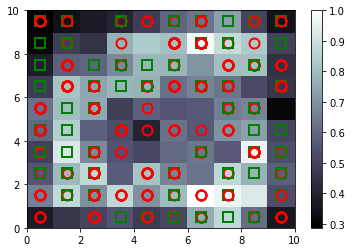

In [41]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()


In [44]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6, 1)], mappings[(6, 9)], mappings[(8, 3)]), axis=0)
frauds = sc.inverse_transform(frauds)


In [45]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))


Fraud Customer IDs
15591010
15642448
15620832
15763108
15730287
15728906
15736510
15729377
15748986
15655658
15643056
15596165
15631451
15632503
15680901
15673747
15569917
15713250
15710138
15679622
